In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls gdrive/MyDrive/Figure\ Layout\ and\ Classification\ Independent\ Study/Shantanu/Colorful_Images_Data

1852AJ______2__158A_p4_d2.jpeg	  1986ApJS___61__105L_p46_d2.jpeg
1896ApJ_____4__274W_p3_d2.jpeg	  1987AJ_____93_1011K_p3_d2.jpeg
1897ApJ_____5__132W_p4_d2.jpeg	  1987AJ_____93__168B_p3_d2.jpeg
1897ApJ_____5__132W_p5_d2.jpeg	  1987AJ_____94_1556S_p4_d2.jpeg
1897ApJ_____6__371M_p5_d2.jpeg	  1987AJ_____94_1641B_p12_d2.jpeg
1898ApJ_____7___90S_p3_d2.jpeg	  1987AJ_____94__345J_p0_d2.jpeg
1898ApJ_____8__120__p0_d2.jpeg	  1987AJ_____94__640G_p4_d2.jpeg
1898ApJ_____8__237H_p0_d2.jpeg	  1987ApJ___312L__55S_p1_d2.jpeg
1900ApJ____11___25C_p7_d2.jpeg	  1987ApJ___315L__49S_p2_d2.jpeg
1901ApJ____14__293R_p0_d2.jpeg	  1987ApJ___317__450F_p7_d2.jpeg
1902ApJ____16__178R_p0_d2.jpeg	  1987ApJ___317__892T_p8_d2.jpeg
1903ApJ____17__305P_p3_d2.jpeg	  1987ApJ___317L__63L_p5_d2.jpeg
1903ApJ____17___48P_p14_d2.jpeg   1987ApJ___318__507P_p0_d2.jpeg
1903ApJ____18__210B_p1_d2.jpeg	  1987ApJ___319__671S_p6_d2.jpeg
1903ApJ____18__299R_p9_d2.jpeg	  1987ApJ___320__266M_p12_d2.jpeg
1903ApJ____18___33P_p15_d2.jpeg   19

In [ ]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from glob import glob
print(cv2.__version__)
# import pytesseract
import sklearn
# assert sklearn.__version__ >= "0.20"

# import math
from PIL import Image, ImageOps, ImageFilter, ImageDraw

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

4.1.2


In [ ]:
img_files_rgb = glob('gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/*')
img_files_rgb[:3]

['gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1996ApJ___456__651G_p5_d2.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1985ApJ___299_1036T_p13_d2.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1967ApJ___150L_129L_p3_d2.jpeg']

In [ ]:
len(img_files_rgb)

829

In [ ]:
# List of files get

# X_ours defined below:

In [ ]:
X_ours = np.zeros([len(img_files_rgb), 224, 224, 3]).astype('uint8')
X_ours.shape

(829, 224, 224, 3)

In [ ]:
print(X_ours)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [ ]:
# Just checking if the img_files_rgb path is similar to that of the good and bad file path
good_file_list = 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/good_file_list_0.9_iou.txt'

In [ ]:
with open(good_file_list,'r') as f:
    filenames = f.read().splitlines()

In [ ]:
filenames[:5]

['gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1995ApJ___445L__23E_p0_d2.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1916ApJ____44__190H_p7_d2.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1898ApJ_____8__120__p0_d2.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1965ApJ___142__399N_p2_d2.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1993ApJ___410___68R_p12_d2.jpeg']

In [ ]:
img_files_rgb[:3]

['gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1996ApJ___456__651G_p5_d2.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1985ApJ___299_1036T_p13_d2.jpeg',
 'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/Colorful_Images_Data/1967ApJ___150L_129L_p3_d2.jpeg']

In [ ]:
with open(r'gdrive/MyDrive/Figure Layout and Classification Independent Study/Shantanu/good_file_list_0.9_iou.txt', 'r') as fp:
    x = len(fp.readlines())
    print('Total lines:', x)

Total lines: 447


# y_ours defined below:

In [ ]:
y_ours = np.zeros(len(img_files_rgb)).astype('uint8')

In [ ]:
# Took 13min and 12 secs to run the below script:
import sys;
for i, image_file in enumerate(img_files_rgb):
      if image_file in filenames:
          y_ours[i] = 1
      # open the file
      img_ours_rgb = np.array(Image.open(image_file))
      # resize
      img_resized = cv2.resize(img_ours_rgb, (224, 224))
      # our images
      X_ours[i] = img_resized

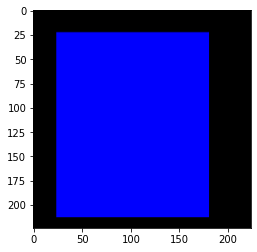

In [ ]:
plt.imshow(img_resized)

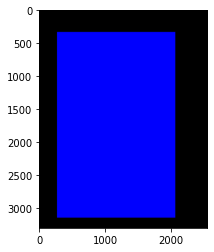

In [ ]:
plt.imshow(img_ours_rgb)

In [ ]:
print(X_ours.shape)

(829, 224, 224, 3)


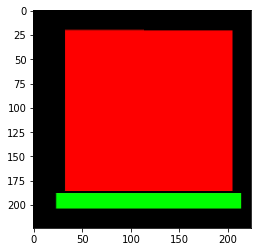

In [ ]:
plt.imshow(X_ours[0].astype('uint8'))

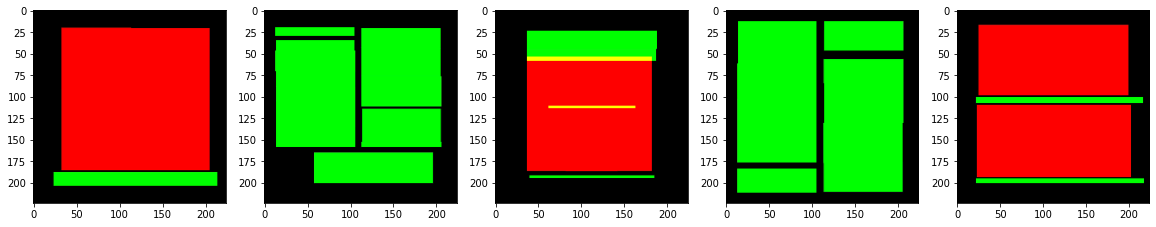

In [ ]:
# let's take a look!
fig, ax = plt.subplots(1,5,figsize=(20,6))

for i in range(5):
    ax[i].imshow(X_ours[i,:])
plt.show()

In [ ]:
len(X_ours)

829

In [ ]:
len(y_ours[y_ours==1]) / len(y_ours)

0.5379975874547648

In [ ]:
len(y_ours)

829

In [ ]:
ind = np.arange(len(y_ours))
ind

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Random shuffling of the dataset:

In [ ]:
np.random.shuffle(ind)
# ind

In [ ]:
X_ours = X_ours[ind,:]
X_ours

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

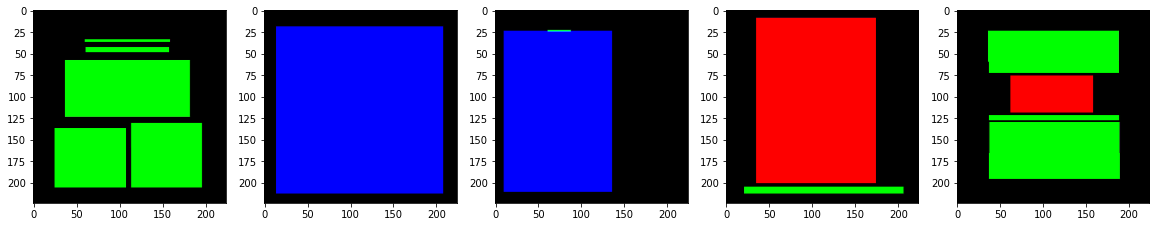

In [ ]:
# let's take a look!
fig, ax = plt.subplots(1,5,figsize=(20,6))

for i in range(5):
    ax[i].imshow(X_ours[i])
plt.show()

In [ ]:
y_ours = y_ours[ind]
y_ours

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [ ]:
# SPLIT IT by indices then turn it into images?
# You can use tf.Generator()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ours, y_ours, stratify=y_ours,
                                                    test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=1)

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
y_train[:20]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
      dtype=uint8)

In [ ]:
# X_train --> (1, 2, 3), SPLIT IT BY INDICES

In [ ]:
X_test

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [ ]:
X_train.shape, X_test.shape

((497, 224, 224, 3), (166, 224, 224, 3))

In [ ]:
y_train.shape, y_test.shape

((497,), (166,))

In [ ]:
len(y_ours)

829

In [ ]:
len(y_ours[y_ours==0])

383

In [ ]:
len(y_ours[y_ours==0]) / len(y_ours)

0.4620024125452352

In [ ]:
len(y_ours[y_ours==1])

446

In [ ]:
len(y_ours[y_ours==1]) / len(y_ours)

0.5379975874547648

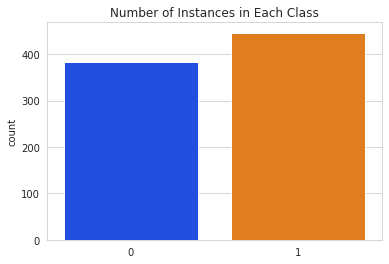

In [ ]:
# Bad File = 343 instances and Good file list = 447 instances
# 0 represents Bad Class and 1 represents Good class
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x=y_ours, palette='bright').set(title='Number of Instances in Each Class');

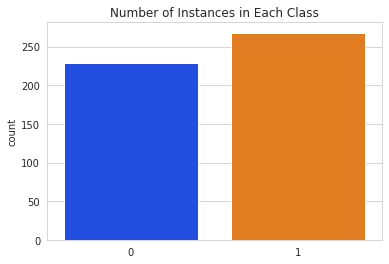

In [ ]:
# Bad File = 343 instances and Good file list = 447 instances
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x=y_train, palette='bright').set(title='Number of Instances in Each Class');

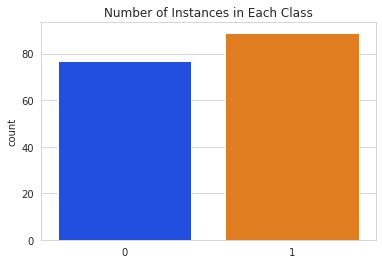

In [ ]:
# Bad File = 343 instances and Good file list = 447 instances
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x=y_val, palette='bright').set(title='Number of Instances in Each Class');

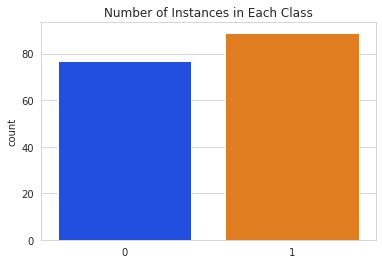

In [ ]:
# Bad File = 343 instances and Good file list = 447 instances
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x=y_test, palette='bright').set(title='Number of Instances in Each Class');

# Model:

In [ ]:
# import keras_tuner as kt
import keras
import tensorflow as tf

---

In [ ]:
tf.keras.backend.clear_session()

# ResNet50:

#### ResNet-50 is CNN architecture that belongs to the ResNet (Residual Networks) family, a series of models designed to address the challenges associated with training deep neural networks. Developed by researchers at Microsoft Research Asia, ResNet-50 is renowned for its depth and efficiency in image classification tasks.

In [ ]:
resnet50_model = keras.models.Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False, # we will be using our own input layer and our own output layer
                   input_shape=(224,224,3),
                   pooling='avg',classes=2, # pooling was initially set to pooling='avg', should it be given "max"
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False # do not learn the weights again, learn the new data weights

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
X_train_resnet = tf.keras.applications.resnet50.preprocess_input( # generator= FIND THE RIGHT DATA FORMAT FOR THIS
    np.copy(X_train), data_format=None)

In [ ]:
X_train_resnet

array([[[[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        ...,

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -1

In [ ]:
X_train_resnet.min(), X_train_resnet.max()

(-123.68, 151.061)

In [ ]:
X_valid_resnet = tf.keras.applications.resnet50.preprocess_input(
    np.copy(X_val), data_format=None
)

In [ ]:
X_valid_resnet.min(), X_valid_resnet.max()

(-123.68, 151.061)

In [ ]:
resnet50_model.add(pretrained_model)
resnet50_model.add(keras.layers.Flatten())
# the weights in the hidden layer will remain same, but in the fully connected dense layers, new weights will be learned
resnet50_model.add(keras.layers.Dense(64, activation='relu'))
resnet50_model.add(keras.layers.Dense(128, activation='relu'))
resnet50_model.add(keras.layers.Dense(256, activation='relu'))
resnet50_model.add(keras.layers.Dense(512, activation='relu'))
# Output layer:
resnet50_model.add(keras.layers.Dense(2, activation='softmax'))

In [ ]:
resnet50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 2)                 1

In [ ]:
resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# use model.fit_genertor()
history_resnet50 = resnet50_model.fit(X_train_resnet, y_train.astype('float'),
                                      epochs=80, batch_size=64,
                                      validation_data=(X_valid_resnet, y_val.astype('float')),
                                      verbose=0,
                                      callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                               patience=50,
                                                                               restore_best_weights=True)])

In [ ]:
history_resnet50.params

{'epochs': 80, 'steps': 8, 'verbose': 0}

# ResNet50 Model Results:

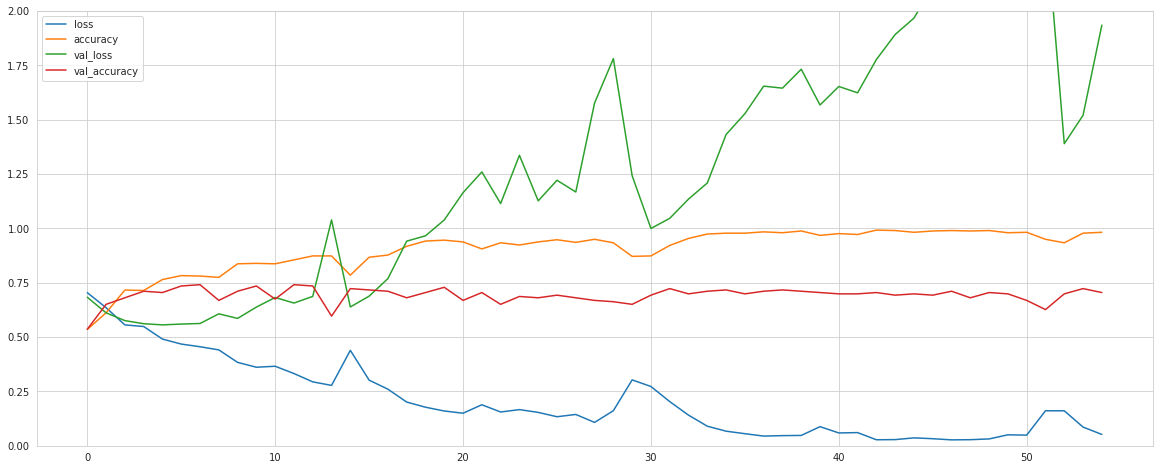

In [ ]:
# ResNet50 Model Results:
pd.DataFrame(history_resnet50.history).plot(figsize=(20, 8))
plt.grid(True)
plt.gca().set_ylim(0, 2)
# save_fig("keras_learning_curves_plot")
plt.show()

# Thoughts: When val_loss starts peaking at the 45th epoch, the model starts to overtrain

In [ ]:
X_test_resnet = tf.keras.applications.resnet50.preprocess_input(
    np.copy(X_test), data_format=None
)

In [ ]:
X_test_resnet.max()

151.061

In [ ]:
resnet50_model.evaluate(X_test_resnet, y_test)

6/6 [==============================] - 2s 77ms/step - loss: 0.5064 - accuracy: 0.7470


[0.5064377188682556, 0.7469879388809204]

In [ ]:
X_new = X_test[:3]
y_proba = resnet50_model.predict(X_test)
y_proba.round(2)

array([[0.18, 0.82],
       [0.68, 0.32],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.2 , 0.8 ],
       [0.6 , 0.4 ],
       [0.89, 0.11],
       [0.36, 0.64],
       [0.83, 0.17],
       [0.51, 0.49],
       [0.55, 0.45],
       [0.54, 0.46],
       [0.89, 0.11],
       [0.49, 0.51],
       [0.77, 0.23],
       [0.18, 0.82],
       [0.95, 0.05],
       [0.49, 0.51],
       [0.78, 0.22],
       [0.89, 0.11],
       [0.17, 0.83],
       [0.34, 0.66],
       [0.87, 0.13],
       [0.8 , 0.2 ],
       [0.19, 0.81],
       [0.69, 0.31],
       [0.21, 0.79],
       [0.95, 0.05],
       [0.5 , 0.5 ],
       [0.87, 0.13],
       [0.14, 0.86],
       [0.7 , 0.3 ],
       [0.32, 0.68],
       [0.67, 0.33],
       [0.36, 0.64],
       [0.5 , 0.5 ],
       [0.44, 0.56],
       [0.62, 0.38],
       [0.79, 0.21],
       [0.57, 0.43],
       [0.44, 0.56],
       [0.21, 0.79],
       [0.87, 0.13],
       [0.55, 0.45],
       [0.92, 0.08],
       [0.56,

In [ ]:
y_pred = np.argmax(resnet50_model.predict(X_test), axis=-1)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
y_new = y_test[:3]
y_new

array([1, 1, 1], dtype=uint8)

In [ ]:
X_train_resnet.shape, X_valid_resnet.shape, X_test_resnet.shape

((497, 224, 224, 3), (166, 224, 224, 3), (166, 224, 224, 3))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((497,), (166,), (166,))

# Precision and Recall Tradeoffs:

# 0 represents Bad Class and 1 represents Good class

### The goal of the precision is to classify all the Positive samples as Positive, and not misclassify a negative sample as Positive.
### Precision = True Positive / TP + FP

In [ ]:
# 0.10 cutoff has  images
# 0.01 cutoff has images
# 0.50 cutoff has  images

X_new = X_test_resnet[:]
y_proba = resnet50_model.predict(X_new)
y_proba.round(2)

# Count the number of images we have gotten wrong
# Play with the threshold
# Trying to minimize the False-Positive Rate
# TP in good class/ TP + FP in good class, CALCULATE PRECISION AT DIFFERENT CUTOFFS, filtering out the False positives
tp_rate = 0
fp_rate = 0
threshold = 0.50

correctly_clf_good_list = []
misclf_good_list = []
ground_truth = 0

for x, y, prob in zip(X_test, y_test, y_proba.round(2)):# This is looping over all classifications
    if y == 1:
        ground_truth += 1
    if prob[0] < threshold:# Given a threshold, these are pulling the images which are good, for this threshold
        # getting the classes here which are actually good
        if y == 1:
            tp_rate += 1
            correctly_clf_good_list.append(x)
        elif y == 0:
            misclf_good_list.append(x)
            fp_rate += 1

print("Correctly Classified Instances as Good class: ", tp_rate)
print("InCorrectly Classified Instances as Good class: ", fp_rate)
print("Ground Truth: ", ground_truth)

Correctly Classified Instances as Good class:  75
InCorrectly Classified Instances as Good class:  28
Ground Truth:  89


In [ ]:
# The things we r classifying as good, what number are actually good
precision = tp_rate / (tp_rate + fp_rate)
precision

0.7281553398058253

In [ ]:
## How to get the file path for good and bad files for the images, hint split the X_train, X_val, X_test, y_train, y_val, y_test split the indices
## Look into the colors of images to know which classes are getting tagged as red, blue, green, and so on.
## Check the detectron model code for this where we generated the Colorful_Images_Folder

In [ ]:
len(misclf_good_list)

28

In [ ]:
len(correctly_clf_good_list)

75

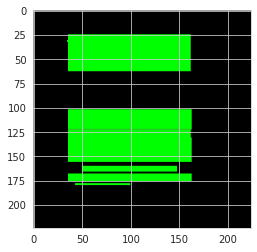

In [ ]:
for x in misclf_good_list:
    plt.imshow(x) # just printing the last plot

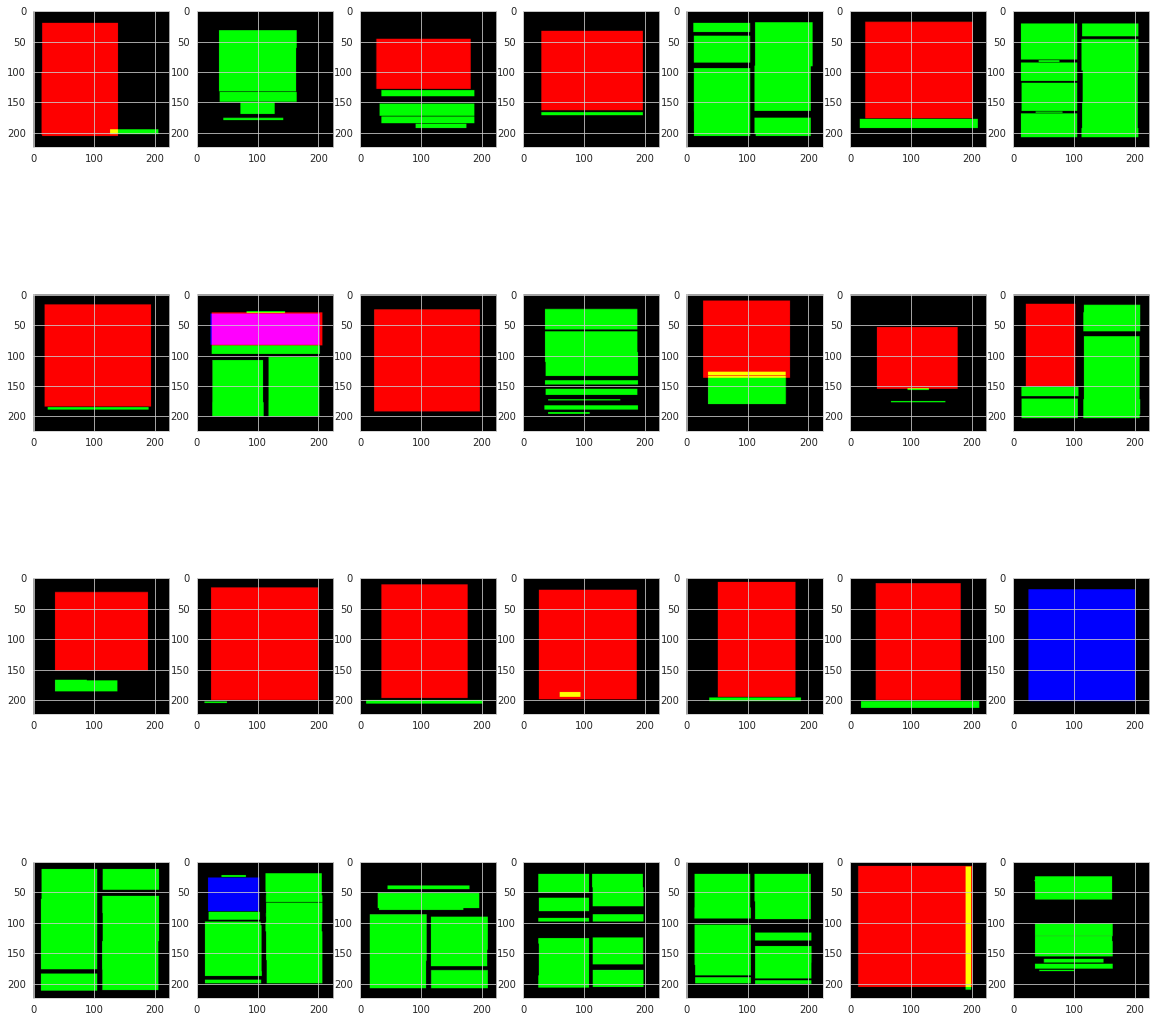

In [ ]:
# let's take a look!
# 4 rows of 8 plots across
fig, ax = plt.subplots(4,7,figsize=(20,20))
ax = ax.flatten() # It will take a 2D thing and will convert it to 1D things

for i in range(28):
    ax[i].imshow(misclf_good_list[i])
plt.show()

In [ ]:
# let's take a look!
# 12, 6 is the total number of plots:
fig, ax = plt.subplots(8, 7,figsize=(20, 20))
ax = ax.flatten() # It will take a 2D thing and will convert it to 1D things

for i in range(56):
    ax[i].imshow(correctly_clf_good_list[i])
plt.show()

### Check the colors for all the classes, in the Detectron2 file
### The table is blue color and so on.
### Red color is for figures
### Green is for text

In [ ]:
# For cut-off 0.10
tp_rate = 0
fp_rate = 0
threshold = 0.10
misclf_good_list = []
correctly_clf_good_list = []
for x, y, prob in zip(X_test, y_test, y_proba.round(2)):# This is looping over all classifications
    if prob[0] < threshold:# Given a threshold, these are pulling the images which are good, for this threshold
        # getting the classes here which are actually good
        if y == 1:
            tp_rate += 1
            correctly_clf_good_list.append(x)
        elif y == 0:
            misclf_good_list.append(x)
            fp_rate += 1

print("Correctly Classified Instances as Good class: ", tp_rate)
print("InCorrectly Classified Instances as Good class: ", fp_rate)
print("Ground Truth: ", ground_truth)

Correctly Classified Instances as Good class:  16
InCorrectly Classified Instances as Good class:  2
Ground Truth:  89


In [ ]:
# For cut-off 0.50
tp_rate = 0
fp_rate = 0
threshold = 0.50
misclf_good_list = []
correctly_clf_good_list = []
for x, y, prob in zip(X_test, y_test, y_proba.round(2)):# This is looping over all classifications
    if prob[0] < threshold:# Given a threshold, these are pulling the images which are good, for this threshold
        # getting the classes here which are actually good
        if y == 1:
            tp_rate += 1
            correctly_clf_good_list.append(x)
        elif y == 0:
            misclf_good_list.append(x)
            fp_rate += 1

print("Correctly Classified Instances as Good class: ", tp_rate)
print("InCorrectly Classified Instances as Good class: ", fp_rate)
print("Ground Truth: ", ground_truth)

Correctly Classified Instances as Good class:  75
InCorrectly Classified Instances as Good class:  28
Ground Truth:  89


In [ ]:
# Look at the individual images if we r getting any wrongly classified, for 50-50 cutoff

# Trying to filter out instances for Misclassified Bad list:

In [ ]:
# threshold = 0.01

# for y, prob in zip(y_test, y_proba.round(2)):# This is looping over all classifications
#     if prob[1] < threshold:
#         print(prob, y)

In [ ]:
tp_rate_bad = 0
fp_rate_bad = 0
threshold_bad = 0.01

correctly_clf_bad_list = []
misclf_bad_list = []

for x, y, prob in zip(X_test, y_test, y_proba.round(2)):# This is looping over all classifications
    # Does the prob[0] or [1] represent the class? 0 is bad class and 1 is good class
    if prob[1] < threshold_bad:# Given a threshold, these are pulling the images which are bad, for this threshold
        # getting the classes here which are actually bad
        if y == 1:
            tp_rate_bad += 1
            correctly_clf_bad_list.append(x)
        elif y == 0:
            fp_rate_bad += 1
            misclf_bad_list.append(x)

print("Correctly Classified Instances as Bad class: ", tp_rate_bad)
print("InCorrectly Classified Instances as Bad class: ", fp_rate_bad)

Correctly Classified Instances as Bad class:  0
InCorrectly Classified Instances as Bad class:  0


In [ ]:
# # The things we are classifying as bad, what number are actually bad
# precision_bad = tp_rate_bad / (tp_rate_bad + fp_rate_bad)
# precision_bad

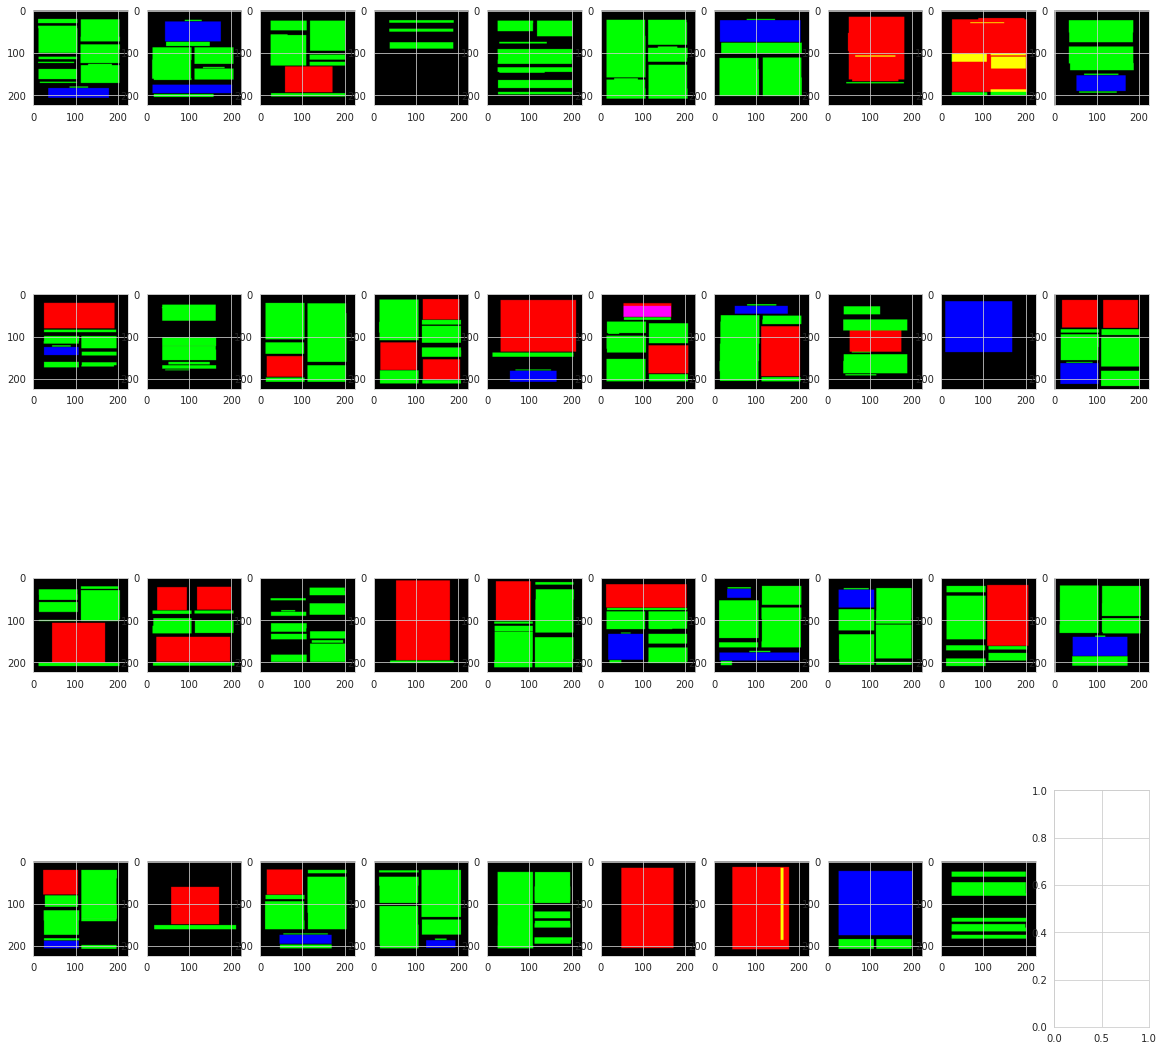

In [ ]:
# let's take a look!
# 4 rows of 8 plots across
fig, ax = plt.subplots(4,10,figsize=(20,20))
ax = ax.flatten() # It will take a 2D thing and will convert it to 1D things

for i in range(39):
    ax[i].imshow(misclf_bad_list[i])
plt.show()

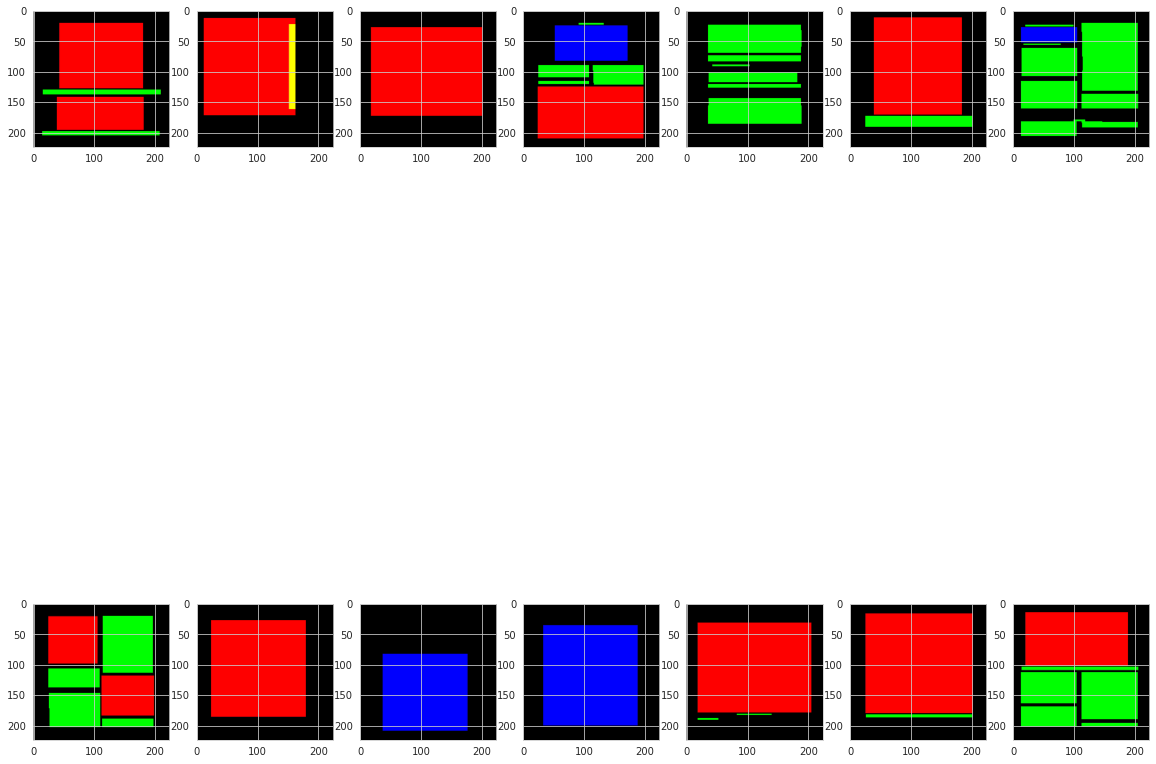

In [ ]:
fig, ax = plt.subplots(2,7,figsize=(20,20)) # can use 1 x 14
ax = ax.flatten() # It will take a 2D thing and will convert it to 1D things

for i in range(14):
    ax[i].imshow(correctly_clf_bad_list[i])
plt.show()

In [ ]:
tp_rate_bad = 0
fp_rate_bad = 0
threshold_bad = 0.10

correctly_clf_bad_list = []
misclf_bad_list = []

for x, y, prob in zip(X_test, y_test, y_proba.round(2)):# This is looping over all classifications
    # Does the prob[0] or [1] represent the class? 0 is bad class and 1 is good class
    if prob[1] < threshold_bad:# Given a threshold, these are pulling the images which are bad, for this threshold
        # getting the classes here which are actually bad
        if y == 1:
            tp_rate_bad += 1
            correctly_clf_bad_list.append(x)
        elif y == 0:
            fp_rate_bad += 1
            misclf_bad_list.append(x)

print("Correctly Classified Instances as Bad class: ", tp_rate_bad)
print("InCorrectly Classified Instances as Bad class: ", fp_rate_bad)

Correctly Classified Instances as Bad class:  17
InCorrectly Classified Instances as Bad class:  42


In [ ]:
tp_rate_bad = 0
fp_rate_bad = 0
threshold_bad = 0.50

correctly_clf_bad_list = []
misclf_bad_list = []

for x, y, prob in zip(X_test, y_test, y_proba.round(2)):# This is looping over all classifications
    # Does the prob[0] or [1] represent the class? 0 is bad class and 1 is good class
    if prob[1] < threshold_bad:# Given a threshold, these are pulling the images which are bad, for this threshold
        # getting the classes here which are actually bad
        if y == 1:
            tp_rate_bad += 1
            correctly_clf_bad_list.append(x)
        elif y == 0:
            fp_rate_bad += 1
            misclf_bad_list.append(x)

print("Correctly Classified Instances as Bad class: ", tp_rate_bad)
print("InCorrectly Classified Instances as Bad class: ", fp_rate_bad)
print("Ground Truth: ", ground_truth)

Correctly Classified Instances as Bad class:  13
InCorrectly Classified Instances as Bad class:  49
Ground Truth:  89


In [ ]:
# The things we are classifying as bad, what number are actually bad
precision_bad = tp_rate_bad / (tp_rate_bad + fp_rate_bad)
precision_bad

0.20967741935483872

In [ ]:
tp_rate_bad = 0
fp_rate_bad = 0
threshold_bad = 0.70

correctly_clf_bad_list = []
misclf_bad_list = []

for x, y, prob in zip(X_test, y_test, y_proba.round(2)):# This is looping over all classifications
    # Does the prob[0] or [1] represent the class? 0 is bad class and 1 is good class
    if prob[1] < threshold_bad:# Given a threshold, these are pulling the images which are bad, for this threshold
        # getting the classes here which are actually bad
        if y == 1:
            tp_rate_bad += 1
            correctly_clf_bad_list.append(x)
        elif y == 0:
            fp_rate_bad += 1
            misclf_bad_list.append(x)

print("Correctly Classified Instances as Bad class: ", tp_rate_bad)
print("InCorrectly Classified Instances as Bad class: ", fp_rate_bad)

Correctly Classified Instances as Bad class:  25
InCorrectly Classified Instances as Bad class:  43


## Understanding the ResNet Model's Performance:

In [ ]:
# Importing Necessary Libraries:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.596386


In [ ]:
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[15 62]
 [ 5 84]]


In [ ]:
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

Precision: 0.575342


In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

Recall: 0.943820


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)


F1 score: 0.714894


In [ ]:
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.145907


In [ ]:
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

ROC AUC: 0.569313
